<a href="https://colab.research.google.com/github/galadriel2486/top_books_project/blob/main/Livros_projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SOBRE O PROJETO**

***Projeto de extração de dados da lista de livros mais vendidos de 2020 do site Publish News***
<p>A partir de uma lista exposta no site PublishNews que informava os livros mais vendidos de 2020, fizemos uma raspagem dos dados para, em seguida, armazená-los em um arquivo .csv. Em seguida, realizamos uma breve análise exploratória deles.

<p>Os dados extraídos foram: título, autores, editoras, páginas, categoria posição e número de exemplares vendidos.</p>
<p>Os títulos estão distribuídos em seis categorias, as quais se localizam em seis endereços diferentes:


1.   Geral
2.   Ficção
3. Não ficção
4. Autoajuda
5. Infantojuvenil
6. Negócios

**Desafios:**
- Desenvolver a raspagem de modo que ela pudesse ser lida pelo Pandas como Dataframe (criação de listas, definição das variáveis, identificação dos valores...);
- Armazenar os dados em um arquivo .csv;
- Realizar o scraping das mesmas variáveis, porém presentes em várias páginas.
- Realizar as representações visuais das análises por meio da plotagem dos gráficos utilizando a biblioteca Matplotlib.





# **ETAPA 1. Raspagem com Beautiful Soup e Requests**
<p>A biblioteca BeautifulSoup é um dos pacotes em Python mais conhecidos de raspagem de dados de arquivos HTML e XML. Junto do Requests, que nos auxiliou a importar a página em código HTML, utilizamos uma página-exemplo apenas para mostrar como o processo será feito.</p>
<p>Uma consideração é que não existe somente o módulo Requests que cumpre esta função de gerar um GET no endereço de destino. Além dele, temos o urllib e o urllib 2, que são bibliotecas do próprio pacote Python, além do urllib3 que, apesar do nome, é um módulo independente a partir do qual se baseia o Requests. A opção por este último se deu por dois motivos: (1) uso recorrente na comunidade de web scraping com Python; (2) ser uma biblioteca criada para simplificar e facilitar o processo de solicitação HTTP. Diante das necessidades do projeto, ela cumpre sua função suficientemente.</p>

In [ ]:
import requests
from bs4 import BeautifulSoup

Após importar os módulos, solicitamos ao servidor para acessar o conteúdo HTML da página-exemplo que iremos analisar. Para confirmar se o endereço está acessível e se o processo deu certo, aplicamos o método request.get() que, em retorno, forneceu o *status_code* 200 da solicitação. Este valor informa que o processo foi completado com êxito.
<p>Importante destacar que antes de iniciar a solicitação, conferimos o arquivo *robots.txt* do portal para verificar se ele permite sua raspagem e se há alguma restrição como você pode conferir abaixo:</p>

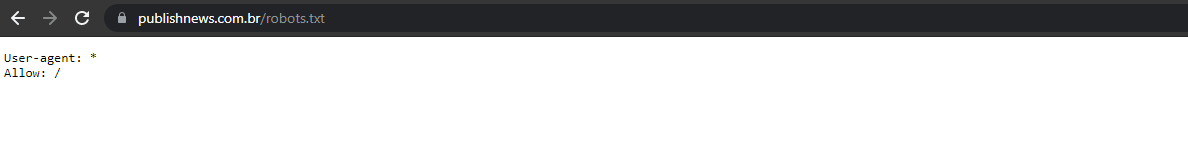

Não há nenhuma restrição específica para raspagem do site. Além disso, também fizemos um pedido de confirmação da requisição é para evitar quaisquer conflitos de execução da raspagem que possam ocorrer, como um valor 404, que indica que o endereço de destino não pode ser encontrado.</p>

In [ ]:
response = requests.get('https://www.publishnews.com.br/ranking/anual/0/2020/0/0')
response

<Response [200]>

A biblioteca Requests possui uma função própria que importa o conteúdo HTML direto do arquivo web. Porém, não a utilizaremos para a nossa análise dos blocos de onde os dados serão raspados.
<p>Uma informação interessante é que se a função *text* for utilizada diretamente na célula, ela resultará na importação do código HTML desestruturado, contínuo e sem nenhum pulo de linhas. Para contornar isso, é só utilizar a função *print* do próprio Python, que reproduzirá o código organizado e com suas hierarquias.</p>
<p>Outra opção é utilizar a função *prettify* do BeautifulSoup, que resultará no mesmo texto estruturado.</p>

In [ ]:
response.text

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN"\n\t"http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="pt-br" lang="pt-br">\n<head>\n\t<title>Lista de Mais Vendidos Geral de 2020 | PublishNews</title>\n\t<meta http-equiv="content-language" content="pt-br" />\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />\n\t<meta http-equiv="content-type" content="text/html;charset=utf-8" />\n\t<meta name="viewport" content="width=device-width,user-scalable=yes" />\n\t<meta name="title" content="Lista de Mais Vendidos Geral de 2020 | PublishNews" />\n\t<meta name="author" content="PublishNews" />\n\t<meta name="robots" content="Index,Follow" />\n\t<meta name="handheldfriendly" content="true" />\n\t<meta name="contact" content="redacao@publishnews.com.br" />\n\t<meta name="keywords" content="literatura,mercado editorial,mercado livreiro,bienal do livro,best-seller,clipping,notícias,eventos,livro digital,e-b

Em seguida, criamos uma instância chamada *soup* que recebeu o conteúdo através do módulo Requests. Por meio dela fizemos um parsing-teste utilizando o módulo html.parser. Existem outros métodos como o lxml, o html5lib etc., e a opção pelo html.parser foi devido a ele ser um *parser* presente no próprio Python 3, sem necessitar qualquer instalação extra.

In [ ]:
soup = BeautifulSoup(response.content, 'html.parser')

No código abaixo extraímos o título da página-teste, bem como as informações de cada livro por meio da busca iterada de todo o conteúdo que estivesse presente na classe '*pn-ranking-livros-dados*'. Para que o resultado exibisse somente o texto sem as tags HTML, aplicamos a função *get_text* e o *replace* para eliminar quebras de linha desnecessárias.

In [ ]:
print(soup.title.get_text(), '\n')
for livro in soup.find_all('div', {'class': 'pn-ranking-livro-dados'}):
  print(livro.get_text().replace('\n\n', ''))

Lista de Mais Vendidos Geral de 2020 | PublishNews 

Mais esperto que o diabo
Napoleon Hill
Citadel

A sutil arte de ligar o foda-se
Mark Manson
Intrínseca

Do mil ao milhão
Thiago Nigro
HarperCollins

O milagre da manhã
Hal Elrod
BestSeller

Box Harry Potter
J. K. Rowling
Rocco

Decida vencer
Eduardo Volpato
Gente

O poder da autorresponsabilidade
Paulo Vieira
Gente

Seja foda!
Caio Carneiro
Buzz

Sol da meia-noite
Stephenie Meyer
Intrínseca

Os segredos da mente milionária
T. Harv Eker
Sextante

Mulheres que correm com os lobos (capa dura)
Clarissa Pinkola Estes
Rocco

Pai rico, pai pobre - Edição de 20 anos
Robert T. Kiyosak
Alta Books Editora

Mindset
Carol Dweck
Objetiva

A garota do lago
Charlie Donlea
Faro Editorial

DNA da cocriação
Elainne Ourives
Gente

O poder do hábito
Charles Duhigg
Objetiva

Escravidão -Vol 1
Laurentino Gomes
Globo Livros

A revolução dos bichos
George Orwell
Companhia das Letras

21 lições para o século 21
Yuval Noah Harari
Companhia das Letras

1984
Geo

Nos códigos seguintes, criamos uma variável chamada 'livros-geral' que recebeu o conteúdo extraído da classe 'pn-ranking-livros-posicao clearfix'. Como a busca não foi iterada, ele retornou o conteúdo somente do primeiro livro, e como não utilizamos nenhuma função de limpeza das tags, ele retornou todo o código HTML. A ideia aqui foi identificar os aninhamentos para que fosse possível extrair as informações relacionadas ao ranking de cada título. A partir dela, a análise seguiu conforme a seguinte ordem:

1. Nome (**variável:** primeiro_titulo)
2. Autor (**variavel:** primeiro_autor)
3. Editora (**variavel:** primeiro_editora)
4. Páginas (**variavel:** primeiro_paginas)
5. Categoria (**variavel:** primeiro_categoria)
6. Posição (**variavel:** primeiro_posicao)
7. Exemplares vendidos (**variavel:** primeiro_exemplares)

Cada categoria acima foi transformada em uma variável que recebeu sua respectiva informação.
<p>Sabendo que este processo é apenas um teste com o objetivo de avaliar os comandos de raspagem de cada informação que iremos analisar, escolhemos inserir no nome das variáveis o termo 'primeiro_' para indicar que não são definitivas, mas respondem à intenção de raspar os dados do primeiro livro somente.</p>
<p>Importante observar que alguns valores precisaram ser convertidos de string para inteiro ou float.</p>

In [ ]:
headers_geral = soup.title.get_text()

headers_geral

'Lista de Mais Vendidos Geral de 2020 | PublishNews'

In [ ]:
livros_geral = soup.find_all('div', {'class': 'pn-ranking-livros-posicao clearfix'})

primeiro_geral = livros_geral[0]
primeiro_geral

<div class="pn-ranking-livros-posicao clearfix">
<div class="pn-ranking-livros-posicao-numero">1</div>
<div class="pn-ranking-livros-posicao-volume">113.041</div>
<div class="pn-ranking-livros-posicao-corpo clearfix">
<div class="pn-ranking-livro clearfix">
<div class="pn-ranking-livro-dados">
<div class="pn-ranking-livro-capa"><img alt="" border="0" src="https://www.publishnews.com.br/estaticos/uploads/2021/07/Vgzr5F4Gh4Y0HTGeYaoSimsdVz8uJPebAWx397qktmYwr00d2YDOElgtMJ9QoFAT9LtGKTA3keBzzTDd.jpg"/></div>
<div class="pn-ranking-livro-nome">Mais esperto que o diabo</div>
<div class="pn-ranking-livro-autor">Napoleon Hill</div>
<div class="pn-ranking-livro-editora">Citadel</div>
</div>
<div class="pn-ranking-livro-extras" style="display:none;">
<div class="pn-ranking-livro-resumo"><p>Escrito em 1938, após uma das maiores crises econômicas, e precedendo a Segunda Guerra Mundial, este livro não somente é uma fonte de inspiração e coragem, mas deve ser considerado um manual para todas aquelas 

In [ ]:
primeiro_titulo = primeiro_geral.find('div', {'class': 'pn-ranking-livro-nome'})
primeiro_titulo.text

'Mais esperto que o diabo'

In [ ]:
primeiro_autor = primeiro_geral.find('div', {'class': 'pn-ranking-livro-autor'})
primeiro_autor.text

'Napoleon Hill'

In [ ]:
primeiro_editora = primeiro_geral.find('div', {'class': 'pn-ranking-livro-editora'})
primeiro_editora.text

'Citadel'

In [ ]:
primeiro_paginas = primeiro_geral.find('div', {'class': 'pn-ranking-livro-paginas'})
primeiro_paginas = int(primeiro_paginas.strong.text)
print(primeiro_paginas)

200


In [ ]:
primeiro_categoria = primeiro_geral.find('div', {'class': 'pn-ranking-livro-categoria'})
primeiro_categoria = primeiro_categoria.strong.text
print(primeiro_categoria)

Autoajuda


In [ ]:
primeiro_posicao = primeiro_geral.find('div', {'class': 'pn-ranking-livros-posicao-numero'})
primeiro_posicao = int(primeiro_posicao.text)
print(primeiro_posicao)

1


In [ ]:
primeiro_exemplares = primeiro_geral.find('div', {'class': 'pn-ranking-livros-posicao-volume'})
primeiro_exemplares = float(primeiro_exemplares.text)
print(primeiro_exemplares)

113.041


O Pandas é uma biblioteca em Python criada para auxiliar na manipulação e análise de dados. Sua especialidade é o poder de agrupar e organizar os dados em Dataframes, que são tabelas através das quais visualizaremos e trabalharemos com as informações. Desse modo, o utilizaremos para testar tanto esse primeiro exercício de elaboração dos comandos de extração como no exercício seguinte, que se trata do script pronto para raspar os dados de uma página-teste.

In [ ]:
import pandas as pd

teste1_df = pd.DataFrame({'livro': primeiro_titulo,
                        'autor/a': primeiro_autor,
                        'editora': primeiro_editora,
                        'paginas': primeiro_paginas,
                        'categoria': primeiro_categoria,
                        'ranking': primeiro_posicao,
                        'exemplares_vendidos': primeiro_exemplares}, index=[0])
print(teste1_df.info())
teste1_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 0 to 0
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   livro                1 non-null      object 
 1   autor/a              1 non-null      object 
 2   editora              1 non-null      object 
 3   paginas              1 non-null      int64  
 4   categoria            1 non-null      object 
 5   ranking              1 non-null      int64  
 6   exemplares_vendidos  1 non-null      float64
dtypes: float64(1), int64(2), object(4)
memory usage: 64.0+ bytes
None


,livro,autor/a,editora,paginas,categoria,ranking,exemplares_vendidos
0,Mais esperto que o diabo,Napoleon Hill,Citadel,200,Autoajuda,1,113.041


In [ ]:
# Listas nas quais os dados serão armazenados
teste_titulos = []
teste_autores = []
teste_editoras = []
teste_paginas = []
teste_categorias = []
teste_posicoes = []
teste_exemplares = []

# Extrai os dados, individualmente, do container de livros
for container in livros_geral:
  # Título
  titulo = container.find('div', {'class': 'pn-ranking-livro-nome'})
  titulo = str(titulo.text)
  teste_titulos.append(titulo)
  # Autor
  autor = container.find('div', {'class': 'pn-ranking-livro-autor'})
  autor = str(autor.text)
  teste_autores.append(autor)
  # Editora
  editora = container.find('div', {'class': 'pn-ranking-livro-editora'})
  editora = str(editora.text)
  teste_editoras.append(editora)
  # Paginação
  pagina = container.find('div', {'class': 'pn-ranking-livro-paginas'})
  pagina = int(str(pagina.strong.text).replace('.', ''))
  teste_paginas.append(pagina)
  # Categorias
  categoria = container.find('div', {'class': 'pn-ranking-livro-categoria'})
  categoria = str(categoria.strong.text)
  teste_categorias.append(categoria)
  # Posição
  posicao = container.find('div', {'class': 'pn-ranking-livros-posicao-numero'})
  posicao = int(posicao.text)
  teste_posicoes.append(posicao)
  # Exemplares
  exemplar = container.find('div', {'class': 'pn-ranking-livros-posicao-volume'})
  exemplar = float(str(exemplar.text))
  teste_exemplares.append(exemplar)

# Verifica se a extração funcionou
print(teste_titulos)
print(teste_autores)
print(teste_editoras)
print(teste_paginas)
print(teste_categorias)
print(teste_posicoes)
print(teste_exemplares)

['Mais esperto que o diabo', 'A sutil arte de ligar o foda-se', 'Do mil ao milhão', 'O milagre da manhã', 'Box Harry Potter', 'Decida vencer', 'O poder da autorresponsabilidade', 'Seja foda!', 'Sol da meia-noite', 'Os segredos da mente milionária', 'Mulheres que correm com os lobos (capa dura)', 'Pai rico, pai pobre - Edição de 20 anos', 'Mindset', 'A garota do lago', 'DNA da cocriação', 'O poder do hábito', 'Escravidão -Vol 1', 'A revolução dos bichos', '21 lições para o século 21', '1984']
['Napoleon Hill', 'Mark Manson', 'Thiago Nigro', 'Hal Elrod', 'J. K. Rowling', 'Eduardo Volpato', 'Paulo Vieira', 'Caio Carneiro', 'Stephenie Meyer', 'T. Harv Eker', 'Clarissa Pinkola Estes', 'Robert T. Kiyosak', 'Carol Dweck', 'Charlie Donlea', 'Elainne Ourives', 'Charles Duhigg', 'Laurentino Gomes', 'George Orwell', 'Yuval Noah Harari', 'George Orwell']
['Citadel', 'Intrínseca', 'HarperCollins', 'BestSeller', 'Rocco', 'Gente', 'Gente', 'Buzz', 'Intrínseca', 'Sextante', 'Rocco', 'Alta Books Editor

In [ ]:
type(pagina)

int

In [ ]:
testefinal_df = pd.DataFrame({'livro': teste_titulos,
                              'autor/a': teste_autores,
                              'editora': teste_editoras,
                              'paginacao': teste_paginas,
                              'categoria': teste_categorias,
                              'ranking': teste_posicoes,
                              'exemplares_vendidos': teste_exemplares})
print(testefinal_df.info())
testefinal_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   livro                20 non-null     object 
 1   autor/a              20 non-null     object 
 2   editora              20 non-null     object 
 3   paginacao            20 non-null     int64  
 4   categoria            20 non-null     object 
 5   ranking              20 non-null     int64  
 6   exemplares_vendidos  20 non-null     float64
dtypes: float64(1), int64(2), object(4)
memory usage: 1.2+ KB
None


,livro,autor/a,editora,paginacao,categoria,ranking,exemplares_vendidos
0,Mais esperto que o diabo,Napoleon Hill,Citadel,200,Autoajuda,1,113.041
1,A sutil arte de ligar o foda-se,Mark Manson,Intrínseca,224,Autoajuda,2,104.649
2,Do mil ao milhão,Thiago Nigro,HarperCollins,192,Negócios,3,77.862
3,O milagre da manhã,Hal Elrod,BestSeller,196,Autoajuda,4,62.235
4,Box Harry Potter,J. K. Rowling,Rocco,3096,Infantojuvenil,5,55.124
5,Decida vencer,Eduardo Volpato,Gente,208,Negócios,6,48.946
6,O poder da autorresponsabilidade,Paulo Vieira,Gente,160,Negócios,7,47.641
7,Seja foda!,Caio Carneiro,Buzz,208,Negócios,8,46.790
8,Sol da meia-noite,Stephenie Meyer,Intrínseca,536,Ficção,9,44.401
9,Os segredos da mente milionária,T. Harv Eker,Sextante,176,Negócios,10,44.185


Nomeamos a variável 'pagina' anterior como 'paginas_antiga' para que mantivéssemos a demonstração do erro. Assim, o que fizemos foi converter a variável em string, substituir o ponto final por um espaço em branco para, em seguida, convertê-la para integer. Agora ela pode ser utilizada tanto dentro do dataframe como individualmente.

# **ETAPA 2. Parsing de todas as páginas do ranking**

Extrairemos dados de 20 livros de 6 páginas diferentes, o que totalizará 120 informações. É uma quantidade pequena de dados, o que nos permitirá realizar uma maio quantidade de correlações.
<p>Na primeira etapa elaboramos o script para extração dos dados que buscamos. Porém, ele só funciona em uma página de cada vez e queremos raspar informações de 6 páginas. Assim, percebemos ser necessário automatizar o parsing de todos os arquivos web.</p>
<p>Ao acessarmos as páginas do portal PublishNews, percebemos que os parâmetros da URL se alteram fora de uma ordem específica. A maneira mais simples que encontramos de identificar esses parâmetros foi criando uma lista com os valores que se modificam na mudança de URL. Esses valores foram convertidos para string em uma nova lista chamada url_pagina e foram utilizados no processo de importação de cada página.</p>

In [ ]:
# Lista com os códigos numéricos presentes em cada URL
url_codigo = [0, 9, 13, 5, 11, 8]

# Conversão de cada número da lista url_codigo em string
url_pagina = [str(i) for i in url_codigo]

for codigo in url_pagina:
  r = requests.get(f'https://www.publishnews.com.br/ranking/anual/{codigo}/2020/0/0')
  s = BeautifulSoup(r.content, 'html.parser')
  print(r.url)

https://www.publishnews.com.br/ranking/anual/0/2020/0/0
https://www.publishnews.com.br/ranking/anual/9/2020/0/0
https://www.publishnews.com.br/ranking/anual/13/2020/0/0
https://www.publishnews.com.br/ranking/anual/5/2020/0/0
https://www.publishnews.com.br/ranking/anual/11/2020/0/0
https://www.publishnews.com.br/ranking/anual/8/2020/0/0


Uma das mudanças que fizemos em relação ao script anterior foi puxar, como categoria, o título das respectivas páginas e multiplicá-las 20 vezes, de modo que conseguíssemos manter o mesmo número de valores para todas as colunas no Dataframe do Pandas. Outra vantagem dessa multiplicação é poder usar a lista de headers como categorias de ranking de cada livro.

In [ ]:
# Listas nas quais os dados serão armazenados
headers = []
titulos = []
autores = []
editoras = []
paginas = []
categorias = []
posicoes = []
exemplares = []

for codigo in url_pagina:
  r = requests.get(f'https://www.publishnews.com.br/ranking/anual/{codigo}/2020/0/0')
  s = BeautifulSoup(r.content, 'html.parser')
  livros = s.find_all('div', {'class': 'pn-ranking-livros-posicao clearfix'})


# Extrai os dados, individualmente, do container de livros
  # Headers
  header = s.title.get_text().replace(' | PublishNews', '')
  headers.append(header)
  headers_repeated = [item for item in headers for i in range(20)]

  for container in livros:
    # Título
    titulo = container.find('div', {'class': 'pn-ranking-livro-nome'})
    titulo = str(titulo.text)
    titulos.append(titulo)
    # Autor
    autor = container.find('div', {'class': 'pn-ranking-livro-autor'})
    autor = str(autor.text)
    autores.append(autor)
    # Editora
    editora = container.find('div', {'class': 'pn-ranking-livro-editora'})
    editora = str(editora.text)
    editoras.append(editora)
    # Paginação
    pagina = container.find('div', {'class': 'pn-ranking-livro-paginas'})
    pagina = int(str(pagina.strong.text).replace('.', ''))
    paginas.append(pagina)
    # Posição
    posicao = container.find('div', {'class': 'pn-ranking-livros-posicao-numero'})
    posicao = int(posicao.text)
    posicoes.append(posicao)
    # Exemplares
    exemplar = container.find('div', {'class': 'pn-ranking-livros-posicao-volume'})
    exemplar = float(str(exemplar.text))
    exemplares.append(exemplar)

# Verifica se a extração funcionou
print(headers_repeated)
print(titulos)
print(autores)
print(editoras)
print(paginas)
print(posicoes)
print(exemplares)

['Lista de Mais Vendidos Geral de 2020', 'Lista de Mais Vendidos Geral de 2020', 'Lista de Mais Vendidos Geral de 2020', 'Lista de Mais Vendidos Geral de 2020', 'Lista de Mais Vendidos Geral de 2020', 'Lista de Mais Vendidos Geral de 2020', 'Lista de Mais Vendidos Geral de 2020', 'Lista de Mais Vendidos Geral de 2020', 'Lista de Mais Vendidos Geral de 2020', 'Lista de Mais Vendidos Geral de 2020', 'Lista de Mais Vendidos Geral de 2020', 'Lista de Mais Vendidos Geral de 2020', 'Lista de Mais Vendidos Geral de 2020', 'Lista de Mais Vendidos Geral de 2020', 'Lista de Mais Vendidos Geral de 2020', 'Lista de Mais Vendidos Geral de 2020', 'Lista de Mais Vendidos Geral de 2020', 'Lista de Mais Vendidos Geral de 2020', 'Lista de Mais Vendidos Geral de 2020', 'Lista de Mais Vendidos Geral de 2020', 'Lista de Mais Vendidos de Ficção de 2020', 'Lista de Mais Vendidos de Ficção de 2020', 'Lista de Mais Vendidos de Ficção de 2020', 'Lista de Mais Vendidos de Ficção de 2020', 'Lista de Mais Vendidos

In [ ]:
df = pd.DataFrame({'livro': titulos,
                   'autor/a': autores,
                   'editora': editoras,
                   'paginacao': paginas,
                   'categoria': headers_repeated,
                   'ranking': posicoes,
                   'exemplares_vendidos': exemplares})
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   livro                120 non-null    object 
 1   autor/a              120 non-null    object 
 2   editora              120 non-null    object 
 3   paginacao            120 non-null    int64  
 4   categoria            120 non-null    object 
 5   ranking              120 non-null    int64  
 6   exemplares_vendidos  120 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 6.7+ KB
None


,livro,autor/a,editora,paginacao,categoria,ranking,exemplares_vendidos
0,Mais esperto que o diabo,Napoleon Hill,Citadel,200,Lista de Mais Vendidos Geral de 2020,1,113.041
1,A sutil arte de ligar o foda-se,Mark Manson,Intrínseca,224,Lista de Mais Vendidos Geral de 2020,2,104.649
2,Do mil ao milhão,Thiago Nigro,HarperCollins,192,Lista de Mais Vendidos Geral de 2020,3,77.862
3,O milagre da manhã,Hal Elrod,BestSeller,196,Lista de Mais Vendidos Geral de 2020,4,62.235
4,Box Harry Potter,J. K. Rowling,Rocco,3096,Lista de Mais Vendidos Geral de 2020,5,55.124
...,...,...,...,...,...,...,...
115,Rápido e devagar,Daniel Kahneman,Objetiva,608,Lista de Mais Vendidos de Negócios de 2020,16,8.266
116,Quem pensa enriquece : o legado (edição de bolso),Napoleon Hill,Citadel,144,Lista de Mais Vendidos de Negócios de 2020,17,7.125
117,O jeito Harvard de ser feliz,Shawn Achor,Saraiva,216,Lista de Mais Vendidos de Negócios de 2020,18,6.960
118,Vade Mecum Saraiva 2020- 29ª Edição,Editora Saraiva,Saraiva,2568,Lista de Mais Vendidos de Negócios de 2020,19,6.152


A próxima etapa será armazenar o Dataframe em um arquivo .csv, para que possamos analisar e manipular os dados sem precisar realizar, toda vez, um novo request no portal PublishNews.

# **Etapa 3. Conversão do Dataframe em Pandas para um arquivo .csv**

A conversão é bem simples uma vez que a biblioteca Pandas já possui uma função específica para transformar um dataframe em um arquivo .csv, bem como para ler esse arquivo no formato de dataframe.

In [ ]:
# O parâmetro 'index = False' remove o marcador da primeira coluna de identificação das linhas
df.to_csv("ProjetoDS_LivrosMaisVendidos2020.csv", index = False)

In [ ]:
projeto = pd.read_csv("ProjetoDS_LivrosMaisVendidos2020.csv")
projeto

,livro,autor/a,editora,paginacao,categoria,ranking,exemplares_vendidos
0,Mais esperto que o diabo,Napoleon Hill,Citadel,200,Lista de Mais Vendidos Geral de 2020,1,113.041
1,A sutil arte de ligar o foda-se,Mark Manson,Intrínseca,224,Lista de Mais Vendidos Geral de 2020,2,104.649
2,Do mil ao milhão,Thiago Nigro,HarperCollins,192,Lista de Mais Vendidos Geral de 2020,3,77.862
3,O milagre da manhã,Hal Elrod,BestSeller,196,Lista de Mais Vendidos Geral de 2020,4,62.235
4,Box Harry Potter,J. K. Rowling,Rocco,3096,Lista de Mais Vendidos Geral de 2020,5,55.124
...,...,...,...,...,...,...,...
115,Rápido e devagar,Daniel Kahneman,Objetiva,608,Lista de Mais Vendidos de Negócios de 2020,16,8.266
116,Quem pensa enriquece : o legado (edição de bolso),Napoleon Hill,Citadel,144,Lista de Mais Vendidos de Negócios de 2020,17,7.125
117,O jeito Harvard de ser feliz,Shawn Achor,Saraiva,216,Lista de Mais Vendidos de Negócios de 2020,18,6.960
118,Vade Mecum Saraiva 2020- 29ª Edição,Editora Saraiva,Saraiva,2568,Lista de Mais Vendidos de Negócios de 2020,19,6.152


# **Etapa 4. Análise exploratória dos dados coletados com Pandas e Matplotlib**

Antes de tudo, é importante ressaltar a metodologia de pesquisa do portal PublishNews para chegar nestas informações. A pesquisa leva em consideração os relatórios de vendas de apenas 23 livrarias o que, de longe, representa a totalidade do mercado editorial. Embora essa seleção acompanhe as livrarias com maior popularidade, também precisamos nos lembrar das várias livrarias independentes que existem em todo o território brasileiro. Logo, os valores apresentados simbolizam uma amostra significativa do mercado, mas não o seu todo. 

In [ ]:
# Importação de novas bibliotecas
import matplotlib.pyplot as plt
import numpy as np

Primeiro, precisamos armazenar o Dataframe dos dados lidos diretamente do arquivo .csv em uma variável, para que possa ser lida pela biblioteca Matplotlib e para que possamos trabalhar sobre ele.

In [ ]:
projeto_df = pd.DataFrame(projeto)

Em seguida, analisamos as primeiras cinco linhas (head) e as últimas cinco linhas (tail) do Dataframe para facilitar a visualização da distribuição dos dados na tabela.

In [ ]:
projeto_df.head()

,livro,autor/a,editora,paginacao,categoria,ranking,exemplares_vendidos
0,Mais esperto que o diabo,Napoleon Hill,Citadel,200,Lista de Mais Vendidos Geral de 2020,1,113.041
1,A sutil arte de ligar o foda-se,Mark Manson,Intrínseca,224,Lista de Mais Vendidos Geral de 2020,2,104.649
2,Do mil ao milhão,Thiago Nigro,HarperCollins,192,Lista de Mais Vendidos Geral de 2020,3,77.862
3,O milagre da manhã,Hal Elrod,BestSeller,196,Lista de Mais Vendidos Geral de 2020,4,62.235
4,Box Harry Potter,J. K. Rowling,Rocco,3096,Lista de Mais Vendidos Geral de 2020,5,55.124


In [ ]:
projeto_df.tail()

,livro,autor/a,editora,paginacao,categoria,ranking,exemplares_vendidos
115,Rápido e devagar,Daniel Kahneman,Objetiva,608,Lista de Mais Vendidos de Negócios de 2020,16,8.266
116,Quem pensa enriquece : o legado (edição de bolso),Napoleon Hill,Citadel,144,Lista de Mais Vendidos de Negócios de 2020,17,7.125
117,O jeito Harvard de ser feliz,Shawn Achor,Saraiva,216,Lista de Mais Vendidos de Negócios de 2020,18,6.960
118,Vade Mecum Saraiva 2020- 29ª Edição,Editora Saraiva,Saraiva,2568,Lista de Mais Vendidos de Negócios de 2020,19,6.152
119,O seu direito de ser rico,Napoleon Hill,Citadel,336,Lista de Mais Vendidos de Negócios de 2020,20,5.698


Como é possível perceber, temos 120 livros no total, cada um com 7 categorias extraídas do site que utilizamos para obter estes dados. Agora utilizaremos a função *describe()* do Pandas para as duas colunas que gostaríamos de obter informações mais detalhadas em relação às métricas quantitativas gerais dos dados: paginacao e exemplares_vendidos.

In [ ]:
# Imprime os valores com três casas decimais
pd.options.display.float_format = '{:.3f}'.format

# Imprime os principais índices estatísticos a partir dos números apresentados
projeto_df.paginacao.describe()

count    120.000
mean     381.467
std      472.563
min       64.000
25%      200.000
50%      288.000
75%      384.250
max     3096.000
Name: paginacao, dtype: float64

In [ ]:
projeto_df.exemplares_vendidos.describe()

count   120.000
mean     27.312
std      22.201
min       4.638
25%      10.600
50%      20.061
75%      39.343
max     113.041
Name: exemplares_vendidos, dtype: float64

###**Questão 1.** Há alguma relação entre o número de páginas e a quantidade de exemplares vendidos?

Analisando os valores exibidos, podemos identificar que os livros possuem, em média, 381 páginas. Contudo, em termos concretos, a média nos fornece poucas informações visto que temos obras com muito mais páginas (o máximo é 3096) e muito menos páginas (o mínimo é 64), ou seja, há uma variância grande.
<p>Por outro lado, a mediana nos fornece um dado interessante, de que o livro que está presente na metade da lista contém 288 páginas. A diferença entre a média e a mediana significa que existem alguns outliers, isto é, valores bem distantes da representação majoritária dos dados (isso fica mais claro no gráfico boxplot plotado abaixo). Esses outliers puxam a média, distanciando-a de uma centralidade. A mediana contribui para entender qual a quantidade de páginas da maior parte dos livros da lista quando há uma variação de valores. A partir desse dado, podemos entender quantas páginas possuem a maior parte das obras do ranking - esse valor não representa, necessariamente, uma preferência de consumo, como veremos depois -, que é entre 200 e 250 páginas (valor que será confirmado daqui a pouco por meio de um histograma).</p>

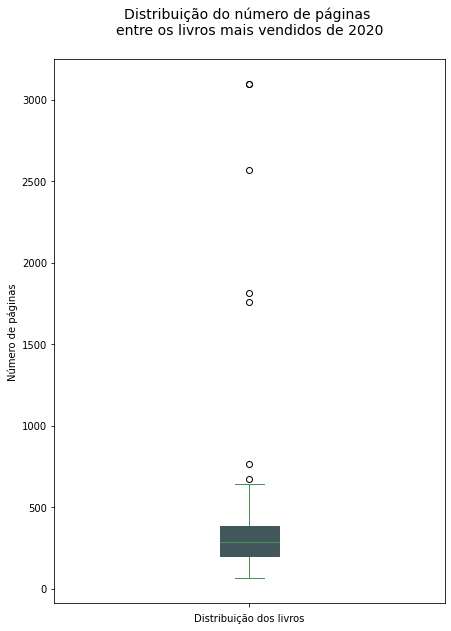

In [ ]:
# Configura o gráfico com a coluna selecionada, o tamanho, remoção do grid de fundo, escolha das cores e do preenchimento do box
paginacao_boxplot = projeto_df.boxplot(
    column = 'paginacao',
    figsize = (7,10),
    grid = False,
    color = dict(boxes = '#41575c', medians = '#469456', caps = '#469456', whiskers = '#469456'),
    patch_artist = True)

# Define os rótulos dos eixos x e y
paginacao_boxplot.set(xlabel = 'Distribuição dos livros', ylabel = 'Número de páginas')

# Remove a marcação da coluna selecionada do eixo x
plt.xticks([1], [''])

# Remove o título superior produzido automaticamente pela biblioteca e o substitui pelo título correto do gráfico
plt.title('Distribuição do número de páginas \nentre os livros mais vendidos de 2020', fontsize = 14, pad = 25)
plt.suptitle('')

# Imprime o gráfico na tela
plt.show()

Quando observamos o gráfico em formato boxplot acima, fica muito claro que alguns livros vendidos possuem uma quantidade de páginas que extrapola o tamanho da maior parte das obras. Por exemplo, se retornarmos à tabela, perceberemos que o título *Vade Mecum Saraiva 2020 - 29ª Edição* possui 2568 páginas. Uma consideração importante é que esta obra não é de leitura, mas de consulta, sendo lançada em formato revisto e atualizado todos os anos.
<p>Os outliers são dados importantíssimos na análise, porém, para o caminho que iremos seguir agora eles não contribuirão, ao contrário, poderão atrapalhar nossa leitura.</p>
<p>A próxima análise envolve entender quantas páginas a maior parte dos livros que estão no ranking possuem, em média. Para isso, utilizaremos uma estratégia que é a de remover os outliers a partir de uma filtragem do intervalo que concentra a maior parte dos valores, chamado de *Interquartil Range*, ou Intervalo Interquartil. Com ele não seremos distraídos pelos dados que estão além desse espaço selecionado.</p>
<p> O raciocínio estatístico está disponível, em detalhes, na internet, entretanto, podemos resumir o cálculo da seguinte forma: (1) buscamos identificar a representação numérica dos mínimos e dos máximos (o intervalo interquartil concentra os valores que estão entre 25% e 75% da área sob a curva do gráfico); (2) calculamos o intervalo por meio de uma fórmula e tendo como base os valores da coluna escolhida; (3) criamos uma variável que filtra esse intervalo a partir dos números apresentados.</p>
<p>Lembrando que este é um primeiro passo para respondermos à nossa pergunta. Primeiro precisamos descobrir qual a frequência de paginação possuem os livros do ranking para, em seguida, correlacionar os valores encontrados com a coluna de exemplares vendidos. Assim, obteremos uma aproximação, em relação à pesquisa realizada, de se o número de páginas se vincula com a quantidade de obras vendidas de um determinado título.
<p>Todavia, precisamos ressaltar que isso não implica que livros de x páginas vendem mais e livros de y páginas vendem menos, visto que para chegar a essa conclusão necessitaríamos realizar uma análise mais detalhada em busca de entender o comportamento do consumidor no momento da escolha e aquisição das obras. Uma pesquisa desse tipo poderia confirmar se, realmente, o número de páginas é um influenciador no momento da decisão.</p>

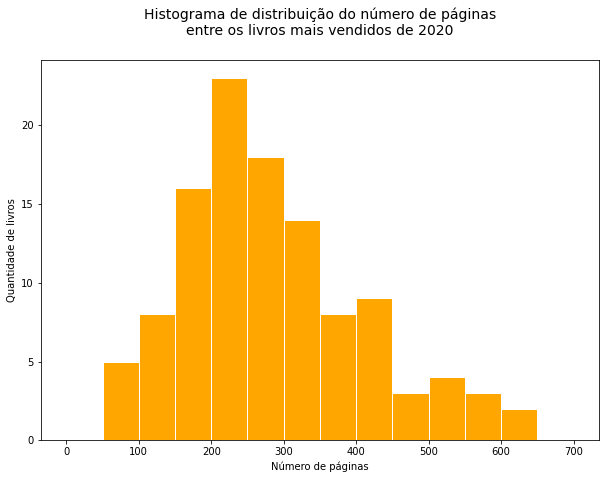

In [ ]:
# Define os pontos mínimo e máximo do intervalo que exclua os outliers (abaixo de 25% e acima de 75% da área sob a curva)
q1 = projeto_df['paginacao'].quantile(0.25)
q3 = projeto_df['paginacao'].quantile(0.75)

# Fórmula que calcula o intervalo interquartil (entre Q1 e Q3)
iqr = q3-q1

# Estabelece os cálculos que resultam no valor de Q1 (mínimo interquartil) e Q3 (máximo interquartil) 
iqr_min  = q1-1.5*iqr
iqr_max = q3+1.5*iqr

# Desenvolve o intervalo a partir de um operador booleano e o armazena em uma variável
projeto_limpo = projeto_df.loc[(projeto_df['paginacao'] > iqr_min) & (projeto_df['paginacao'] < iqr_max)]

# Plota o histograma que exclui os valores externos ao intervalo interquartil
plt.figure(figsize = (10, 7))
paginacao_histograma = plt.hist(
    projeto_limpo['paginacao'],
    color = '#ffa600',
    edgecolor = '#FFF',
    bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700])

plt.title('Histograma de distribuição do número de páginas\nentre os livros mais vendidos de 2020', fontsize = 14, pad = 25)
plt.suptitle('')

plt.xlabel('Número de páginas')
plt.ylabel('Quantidade de livros');

In [ ]:
# Calcula o z-score a partir da média e do desvio padrão do dataframe selecionado
# Cria uma lista para conter somente os valores da coluna "paginacao", sem os respectivos IDs
lista_paginacao = list(projeto_limpo.paginacao)
media_paginacao = projeto_limpo['paginacao'].mean()
desviopadrao_paginacao = projeto_limpo['paginacao'].std()

# Cria uma variável para receber o z-score calculado de cada um dos 113 valores contidos em lista_paginacao
zscore_paginacao = [((num-media_paginacao)/desviopadrao_paginacao) for num in lista_paginacao]

# Imprime a lista final
print(zscore_paginacao)

[-0.6607704675455603, -0.4702122467901839, -0.7242898744640192, -0.6925301710047898, -0.5972510606271015, -0.9783675021378544, -0.5972510606271015, 2.007044623029709, -0.8513286883009368, 2.3246416576220033, 0.4190594500682393, 0.3555400431497805, 0.10146241547594531, 0.03794300855748651, 0.9907341123343686, 1.7529669953558742, -1.0101272055970838, 1.181292333089745, 1.0542535192528273, 2.007044623029709, 0.10146241547594531, -1.0101272055970838, 1.0542535192528273, -0.0890958052794311, 0.6731370777420745, -0.6607704675455603, 0.16498182239440412, 0.03794300855748651, 0.030003082692679154, 0.5302184121755422, -0.5972510606271015, 0.29202063623132174, -0.0890958052794311, -0.5972510606271015, 0.16498182239440412, 0.16498182239440412, 0.8081158174437995, 0.9272147054159098, 1.3242109986562773, 2.3246416576220033, 0.3555400431497805, 1.7529669953558742, 1.181292333089745, 1.4353699607635801, -1.1689257228932308, 1.3083311469266625, 0.03794300855748651, 1.3083311469266625, -1.1054063159747

In [ ]:
# Insere no dataframe "projeto_limpo" uma coluna com os valores do z-score da paginação
projeto_limpo['zscore_paginacao'] = zscore_paginacao

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Seleciona do dataframe "projeto_limpo" o intervalo que observamos maior frequência de livros em relação às suas respectivas páginas
# Cria uma nova variável que contém um novo dataframe originado da seleção realizada já ordenado em sequência crescente
intervalo_paginacao = projeto_limpo[(projeto_limpo['paginacao'] > 150) & (projeto_limpo['paginacao'] < 350)].sort_values(by = ['paginacao'])
intervalo_paginacao

,livro,autor/a,editora,paginacao,categoria,ranking,exemplares_vendidos,zscore_paginacao
22,A revolução dos bichos,George Orwell,Companhia das Letras,156,Lista de Mais Vendidos de Ficção de 2020,3,33.807,-1.010
17,A revolução dos bichos,George Orwell,Companhia das Letras,156,Lista de Mais Vendidos Geral de 2020,18,33.807,-1.010
68,Ansiedade - Como enfrentar o mal do século,Augusto Cury,Saraiva,160,Lista de Mais Vendidos de Autoajuda de 2020,9,23.923,-0.978
6,O poder da autorresponsabilidade,Paulo Vieira,Gente,160,Lista de Mais Vendidos Geral de 2020,7,47.641,-0.978
108,O homem mais rico da Babilônia,George S. Clason,HarperCollins,160,Lista de Mais Vendidos de Negócios de 2020,9,24.409,-0.978
...,...,...,...,...,...,...,...,...
41,Mindset,Carol Dweck,Objetiva,328,Lista de Mais Vendidos de Não ficção de 2020,2,43.351,0.356
11,"Pai rico, pai pobre - Edição de 20 anos",Robert T. Kiyosak,Alta Books Editora,336,Lista de Mais Vendidos Geral de 2020,12,43.416,0.419
105,"Pai rico, pai pobre - Edição de 20 anos",Robert T. Kiyosak,Alta Books Editora,336,Lista de Mais Vendidos de Negócios de 2020,6,43.416,0.419
73,Como fazer amigos e Influenciar pessoas - Ediç...,Dale Carnegie,Companhia Editora Nacional,336,Lista de Mais Vendidos de Autoajuda de 2020,14,18.574,0.419


Desenvolvemos o seguinte processo:
1. Para descobrirmos qual a porcentagem de que um livro x, selecionado aleatoriamente, tenha uma paginação dentro do intervalo de maior frequência (150 a 350 páginas) tivemos que calcular o z-score de cada valor do dataframe sem os outliers (projeto_limpo);
2. Adicionamos os valores do z-score como uma coluna a parte no dataframe original, para nos auxiliar a localizar os respectivos valores;
3. Recortamos o dataframe original (projeto_limpo) selecionando os valores de 150 a 350 da coluna *paginacao* para que pudéssemos analisar somente o intervalo que nos interessava;
4. Ordenamos esse novo dataframe recortado, em ordem ascendente, a partir da coluna *paginacao*.

Com esse resultado poderemos agora descobrir nossa primeira sub-pergunta:

**Do total de livros no ranking, quais as chances dele ter entre 150 a 350 páginas?**

In [ ]:
# TAREFAS:
# COLORIR O INTERVALO ENTRE 150 E 350 DO HISTOGRAMA
# PLOTAR UMA LINHA SOBRE O HISTOGRAMA
# USAR A TABELA DE Z-SCORE -> MIN = -1.010 E MAX = 0.419 -> PARA CALCULAR A ÁREA SOB A CURVA DO INTERVALO 150-350

# OBS:
# LEMBRAR QUE A ANÁLISE DA PAGINAÇÃO RESULTA SOMENTE EM DESCOBRIR QUANTOS LIVROS, DO TOTAL, POSSUEM ENTRE 150 A 350 PGS
# LEMBRAR TB QUE OS Z-SCORES POSSUEM INTERVALOS FIXOS E AVERIGUAR, DESSE INTERVALO, QUAL A FREQUÊNCIA DE PAGINAÇÃO QUE ELE COMPREENDE
# A PARTIR DA PORCENTAGEM É POSSÍVEL DESCOBRIR: DO TOTAL DE LIVROS DO RANKING, QUAIS AS CHANCES DE UM LIVRO ALEATÓRIO TER ENTRE 150 A 350 PGS?
# PARA DESCOBRIR QUANTAS PÁGINAS POSSUEM OS LIVROS MAIS VENDIDOS É PRECISO FAZER UMA CORRELAÇÃO ENTRE PAGINACAO E EXEMPLARES_VENDIDOS E, AVALIANDO A
# ÁREA SOBRE A CURVA DO GRÁFICO DE CORRELAÇÃO, QUAL O INTERVALO MAIS ADQUIRIDO PELOS LEITORES? A PARTIR DISSO, É POSSÍVEL AVALIAR: DE UM LIVRO COMPRADO
# ALEATORIAMENTE POR UM CONSUMIDOR, QUAIS AS CHANCES DELE POSSUIR UMA PAGINAÇÃO FREQUENTE?

O histograma é um tipo de gráfico que nos ajuda a visualizar a frequência de itens em relação a um conjunto de dados. No caso, estamos investigando qual o valor da paginação mais frequente para entendermos, de modo abrangente, se esse número é um critério a ser levado em consideração na aquisição de uma obra e qual faixa de paginação possui maior probabilidade de ser adquirida por um leitor. Com abrangente compreendemos que uma avaliação completa dessa questão envolveria traçar, por meio de pesquisas mais detalhadas, o comportamento do consumidor na hora da compra. Afinal, quais são os fatores que mais influenciam na aquisição de um livro? Ela não pode ser respondida satisfatoriamente por meio da rápida análise de um ranking dos livros mais vendidos. Por outro lado, esse dataset pode nos fornecer diversos insights e novos problemas que poderão ser explorados, com maior foco, posteriormente, por um interessado.
<p>Dessa maneira, com o histograma podemos avaliar que dentre os livros vendidos, a maioria continha aproximadamente 150 e 350 páginas, o que confirma nossa análise anterior com o gráfico boxplot. 

In [ ]:
projeto_df.exemplares_vendidos.describe()

count   120.000
mean     27.312
std      22.201
min       4.638
25%      10.600
50%      20.061
75%      39.343
max     113.041
Name: exemplares_vendidos, dtype: float64

A média de exemplares vendidos ao longo de 2020 dos livros presentes no ranking é de 27.312. O livro mais vendido teve um total de 113.041 exemplares comercializados, enquanto o menos vendido teve um total de 4.638 exemplares comercializados. A partir da análise, também pudemos identificar que a maior parte dos livros vendidos tiveram, em média, 10.000 a 40.000 exemplares comercializados (o que, se considerarmos um país de 200 milhões de pessoas, sinaliza que, se do ranking dos livros mais vendidos temos em média 30.000 obras vendidas, imagina dos livros que sequer entram nesta pesquisa?).
<p>Novamente podemos destacar os outliers, que se aproximam de 113.041 exemplares vendidos, o que significa que existem obras que fogem dessa média, superando-a em muito.</p>

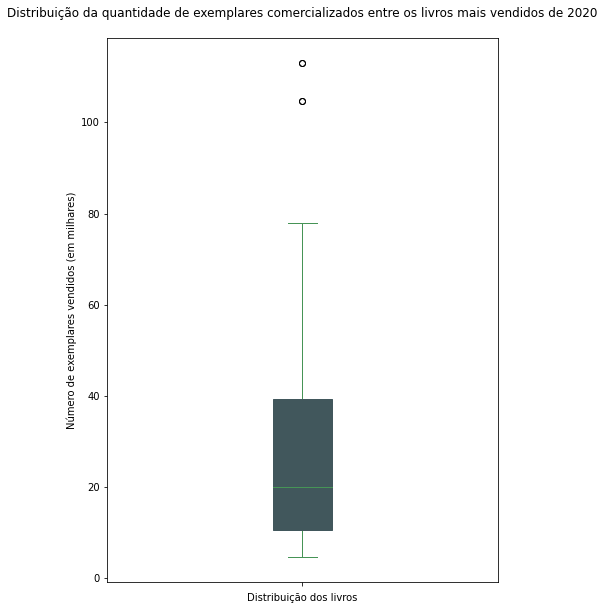

In [ ]:
paginacao_plot = projeto_df.boxplot(
    column = 'exemplares_vendidos',
    figsize = (7,10),
    grid = False,
    color = dict(boxes = '#41575c', medians = '#469456', caps = '#469456', whiskers = '#469456'),
    patch_artist = True)
paginacao_plot.set(xlabel = 'Distribuição dos livros', ylabel = 'Número de exemplares vendidos (em milhares)')
plt.xticks([1], [''])
plt.title('Distribuição da quantidade de exemplares comercializados entre os livros mais vendidos de 2020\n')
plt.suptitle('')
plt.show()

## *a. Qual foi a editora mais vendida de 2020? Em qual categoria ela está mais presente?*

<p> Descobrir qual foi a editora mais vendida de 2020 pode nos dar insights que nos permitirão compreender quais editoras chamaram mais a atenção do público-leitor ao longo do ano. Visualizar a categoria do ranking em que seus livros estiveram presentes com maior frequência nos ajuda a entender, por exemplo, qual o tipo de público ela atrai em maior grau, bem como categorizar sua presença no mercado editorial.</p>
<p>Para obter essa informação utilizaremos a função *value_counts* do Pandas, que agrupa os dados em categorias pré-definidas nas colunas dos datasets.</p>

In [ ]:
editoras_lista = projeto_df[u'editora'].value_counts()
editoras_lista

Intrínseca                    14
Citadel                       13
Companhia das Letras          12
Gente                          9
Sextante                       7
Rocco                          7
HarperCollins                  6
Objetiva                       6
Pixel                          3
Buzz                           3
Globo Alt                      3
Globo Livros                   3
Saraiva                        3
Pandorga                       3
LeYa                           2
BestSeller                     2
Companhia Editora Nacional     2
Faro Editorial                 2
Planeta do Brasil              2
Ciranda Cultural               2
Alta Books Editora             2
Universo dos Livros            1
Record                         1
VR Editora                     1
Mundo Cristão                  1
Petra                          1
Outro Planeta                  1
L&PM                           1
Autêntica                      1
Astral Cultural                1
L&PM POCKE

<BarContainer object of 35 artists>

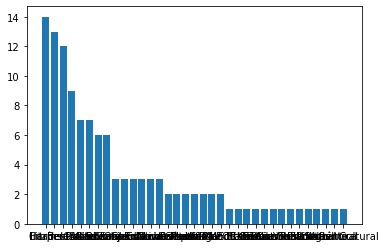

In [ ]:
# DESCOBRIR COMO SELECIONAR AS 5 PRIMEIRAS EDITORAS E PLOTAR UM GRÁFICO DE BARRAS COM ELAS EXCLUSIVAMENTE

editora_x = projeto_df[u'editora'].unique()
vendas_y = projeto_df[u'editora'].value_counts()
plt.bar(x=editora_x, height=vendas_y)

# **Referências**
<p>Sahil Sunny - Dataquest. Tutorial: Web Scraping and BeautifulSoup. Disponível em: https://www.dataquest.io/blog/web-scraping-beautifulsoup/.</p>
<p>MITCHELL, Ryan. Web Scraping with Python. 2 ed. São Paulo: Novatec Editora, 2019.</p>
<p> Pandas Documentation. Disponível em: https://pandas.pydata.org/docs/.</p>
<p> Matplotlib Documentation. Disponível em: https://matplotlib.org/.</p>
https://www.kaggle.com/educfrio/an-lise-explorat-ria-de-dados
<p>Data Color Picker: Palette generator. Disponível em: https://learnui.design/tools/data-color-picker.html.</p>




# **Especificações visuais**
**Paleta de cores**</p>
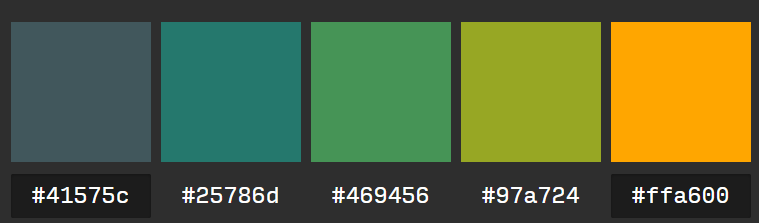